In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


caracteristic_df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
holidays_df = pd.read_csv('holidays.csv', encoding='ISO-8859-1')
places_df = pd.read_csv('places.csv', encoding='ISO-8859-1')
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')
vehicles_df = pd.read_csv('vehicles.csv', encoding='ISO-8859-1')


# Suppression des doublons pour chaque DataFrame
caracteristic_df.drop_duplicates(inplace=True)
holidays_df.drop_duplicates(inplace=True)
places_df.drop_duplicates(inplace=True)
users_df.drop_duplicates(inplace=True)
vehicles_df.drop_duplicates(inplace=True)

# Suppression des lignes vides pour chaque DataFrame
caracteristic_df.dropna(inplace=True)
holidays_df.dropna(inplace=True)
places_df.dropna(inplace=True)
users_df.dropna(inplace=True)
vehicles_df.dropna(inplace=True)

# Affichage des premières lignes pour vérifier
print("Caracteristics:")
print(caracteristic_df.head())
print("\nHolidays:")
print(holidays_df.head())
print("\nPlaces:")
print(places_df.head())
print("\nUsers:")
print(users_df.head())
print("\nVehicles:")
print(vehicles_df.head())


C:\Users\yvenl\AppData\Local\Temp\ipykernel_21436\450772708.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristic_df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
C:\Users\yvenl\AppData\Local\Temp\ipykernel_21436\450772708.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places_df = pd.read_csv('places.csv', encoding='ISO-8859-1')


Caracteristics:
                                              Num_Acc  an  mois  jour  hrmn  \
201600000001 16 2 1 1445 1 2 1 8.0 3.0 5.0  4Num_Acc"  an  mois  jour  hrmn   

                                            lum  agg  int  atm  col  com  adr  \
201600000001 16 2 1 1445 1 2 1 8.0 3.0 5.0  lum  agg  int  atm  col  com  adr   

                                            gps  lat  long  dep  
201600000001 16 2 1 1445 1 2 1 8.0 3.0 5.0  gps  lat  long  dep  

Holidays:
           ds                holiday
0  2005-01-01               New year
1  2005-03-28          Easter Monday
2  2005-05-01             Labour Day
3  2005-05-05     Ascension Thursday
4  2005-05-08  Victory in Europe Day

Places:
           Num_Acc  catr voie   v1 v2  circ  nbv   pr    pr1  vosp  prof  \
38    201600000039   3.0  943  2.0  D   2.0  2.0  6.0  800.0   0.0   2.0   
2485  201600002486   3.0   38  2.0  D   2.0  2.0  6.0  650.0   0.0   1.0   
2564  201600002565   3.0  132  2.0  E   2.0  2.0  0.0  250.0

1. Quel équipement de sécurité est le plus couramment utilisé par les personnes impliquées dans les accidents en France de 2005 à 2016, et comment cette utilisation est-elle distribuée dans la population accidentée ? 

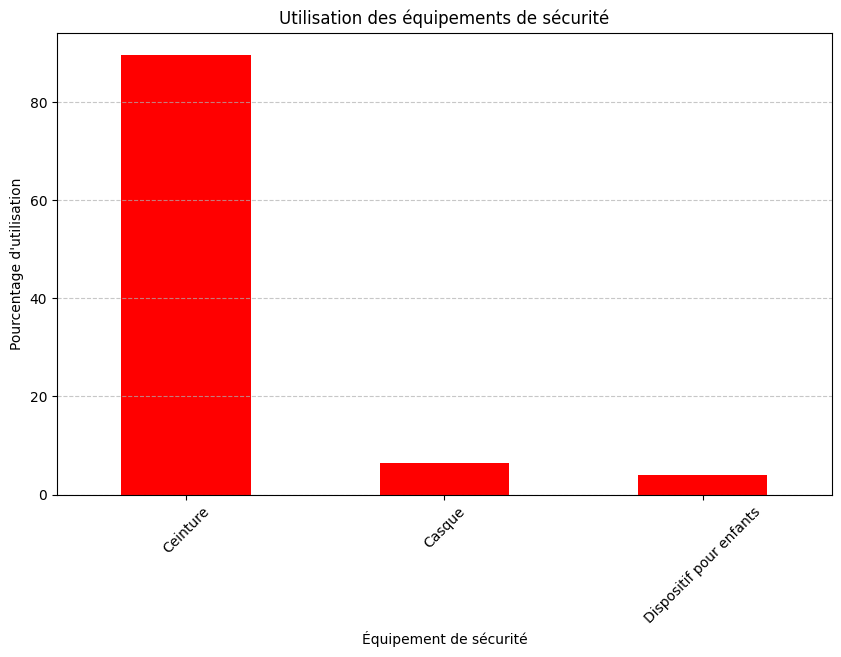

In [3]:

users_df = pd.read_csv('users.csv')

# Remplacement des valeurs 'NA' par NaN
users_df.replace('NA', np.nan, inplace=True)

# Création d'un dictionnaire pour mapper les codes numériques aux noms des équipements en français
equipment_mapping = {
    1: 'Ceinture',
    2: 'Casque',
    3: 'Dispositif pour enfants',
    4: 'Équipement réfléchissant',
    9: 'Autre'
}

users_df['secu'] = users_df['secu'].map(equipment_mapping)

# Calculer les pourcentages d'utilisation des différents équipements de sécurité
equipment_usage = users_df['secu'].value_counts(normalize=True) * 100

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
equipment_usage.plot(kind='bar', color='red')
plt.title('Utilisation des équipements de sécurité')
plt.xlabel('Équipement de sécurité')
plt.ylabel('Pourcentage d\'utilisation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()







2. Quelle est la relation entre l'utilisation de l'équipement de sécurité et la gravité des blessures subies par les personnes impliquées dans les accidents ? 

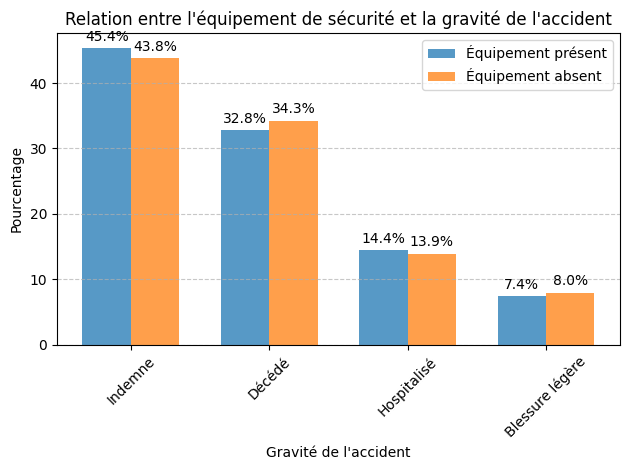

In [4]:

data = pd.read_csv('users.csv')

# Filtrage des données pour l'équipement présent et absent
present_data = data[data['secu'] == 1]
absent_data = data[data['secu'] == 2]

# Calcul des pourcentages pour chaque catégorie de gravité
present_counts = present_data['grav'].value_counts(normalize=True) * 100
absent_counts = absent_data['grav'].value_counts(normalize=True) * 100

# Création des labels pour les barres
labels = ['Indemne', 'Décédé', 'Hospitalisé', 'Blessure légère']
x = range(len(labels))

# Largeur de chaque barre
bar_width = 0.35

# Création du graphique à barres
fig, ax = plt.subplots()
bar_present = ax.bar(x, present_counts, bar_width, label='Équipement présent', alpha=0.75)
bar_absent = ax.bar([i + bar_width for i in x], absent_counts, bar_width, label='Équipement absent', alpha=0.75)

# Fonction pour afficher les pourcentages à l'intérieur des barres
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Ajout de titres et de légendes
ax.set_xlabel('Gravité de l\'accident')
ax.set_ylabel('Pourcentage')
ax.set_title('Relation entre l\'équipement de sécurité et la gravité de l\'accident')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Appel de la fonction autolabel pour chaque jeu de barres
autolabel(bar_present)
autolabel(bar_absent)

# Affichage du graphique
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



On a utilisé la table users, et les des collones : La colonne "secu" qui représente l'équipement de sécurité utilisé.
La colonne "grav" qui représente la gravité des blessures subies par les utilisateurs.
Analyse : 


3. Comment se répartissent les personnes impliquées dans les accidents en France de 2005 à 2016 selon leur sexe ? 

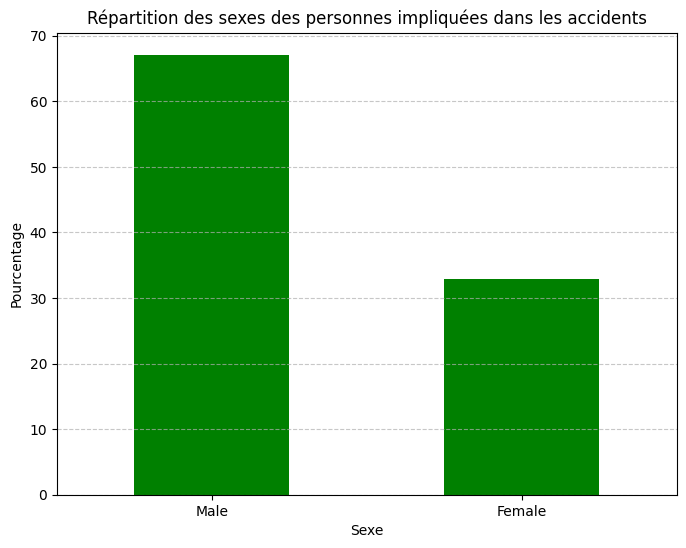

In [5]:

users_df = pd.read_csv('users.csv')

# Remplacement des valeurs numériques par des libellés
users_df['sexe'] = users_df['sexe'].replace({1: 'Male', 2: 'Female'})

# Calcul du pourcentage de répartition des sexes
sex_percentage = users_df['sexe'].value_counts(normalize=True) * 100

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
sex_percentage.plot(kind='bar', color='green')
plt.title('Répartition des sexes des personnes impliquées dans les accidents')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



4. Quelle est la distribution des personnes impliquées dans les accidents en France de 2005 à 2016 par tranche d'âge ? 

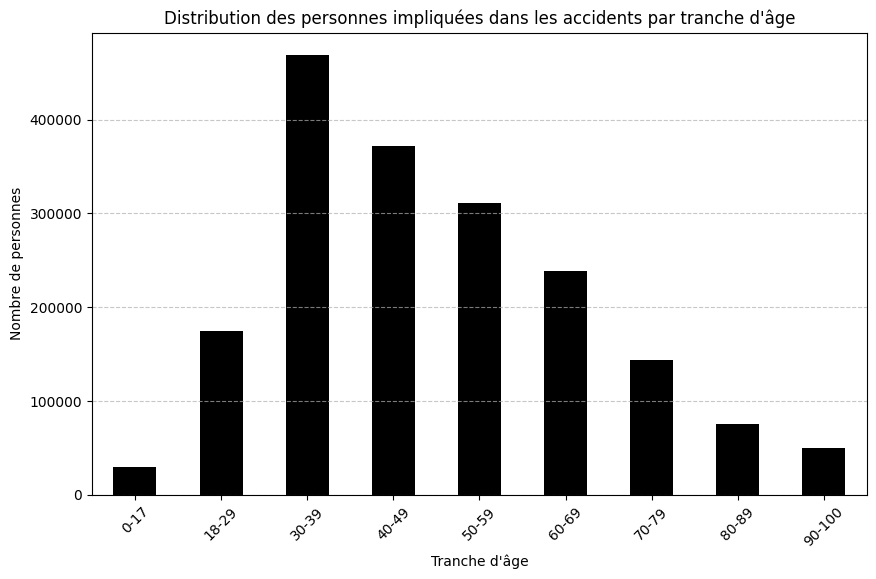

In [6]:

users_df = pd.read_csv('users.csv')

# Calcul de l'âge des personnes impliquées dans les accidents
users_df['age'] = 2022 - users_df['an_nais']

# Définition des tranches d'âge
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Création d'une nouvelle colonne pour les tranches d'âge
users_df['age_group'] = pd.cut(users_df['age'], bins=age_bins, labels=age_labels, right=False)

# Comptage du nombre de personnes dans chaque tranche d'âge
age_distribution = users_df['age_group'].value_counts().sort_index()

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='black')
plt.title('Distribution des personnes impliquées dans les accidents par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


5. Quel est l'état général des personnes impliquées dans les accidents en France de 2005 à 2016, en termes de gravité des blessures ? 

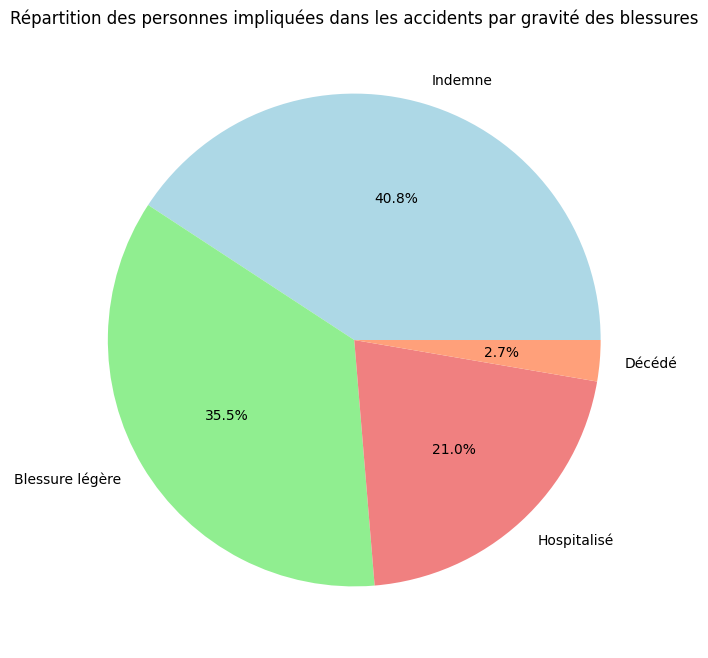

In [7]:
users_df = pd.read_csv('users.csv')

# Création d'un dictionnaire pour mapper les codes de gravité aux libellés
grav_labels = {
    1: 'Indemne',
    2: 'Décédé',
    3: 'Hospitalisé',
    4: 'Blessure légère'
}

# Remplacer les codes de gravité par les libellés correspondants
users_df['grav'] = users_df['grav'].map(grav_labels)

# Comptage du nombre de personnes dans chaque catégorie de gravité
grav_distribution = users_df['grav'].value_counts(normalize=True) * 100

# Tracé du graphique circulaire
plt.figure(figsize=(8, 8))
grav_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Répartition des personnes impliquées dans les accidents par gravité des blessures')
plt.ylabel('')
plt.show()


6. Quels sont les types de routes associés à un risque plus élevé d'accidents en France de 2005 à 2016 ? 

C:\Users\yvenl\AppData\Local\Temp\ipykernel_21436\1765553842.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places_df = pd.read_csv('places.csv')


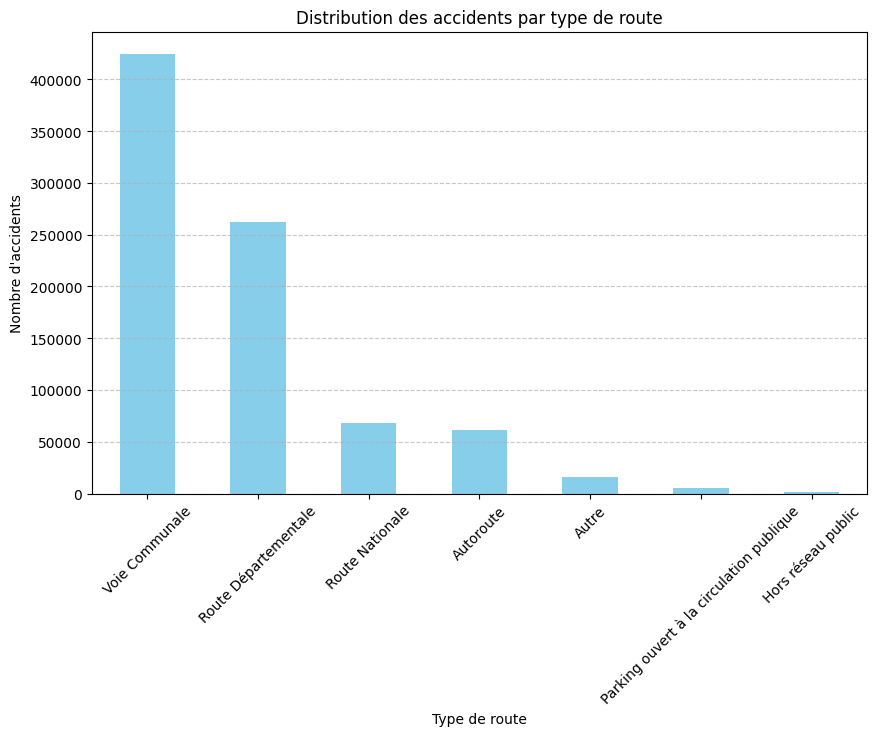

In [8]:
places_df = pd.read_csv('places.csv')

# Remplacement des valeurs numériques par des libellés pour la catégorie de route
road_category_mapping = {
    1: 'Autoroute',
    2: 'Route Nationale',
    3: 'Route Départementale',
    4: 'Voie Communale',
    5: 'Hors réseau public',
    6: 'Parking ouvert à la circulation publique',
    9: 'Autre'
}

places_df['catr'] = places_df['catr'].map(road_category_mapping)

# Analyser la colonne 'catr' (catégorie de route) pour compter le nombre d'accidents par catégorie
accidents_by_road_category = places_df['catr'].value_counts()

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
accidents_by_road_category.plot(kind='bar', color='skyblue')
plt.title('Distribution des accidents par type de route')
plt.xlabel('Type de route')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



7. Comment varie le nombre d'accidents au fil des années de 2005 à 2016 en France ? 

C:\Users\yvenl\AppData\Local\Temp\ipykernel_39728\2466157704.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics_data = pd.read_csv('caracteristics.csv')


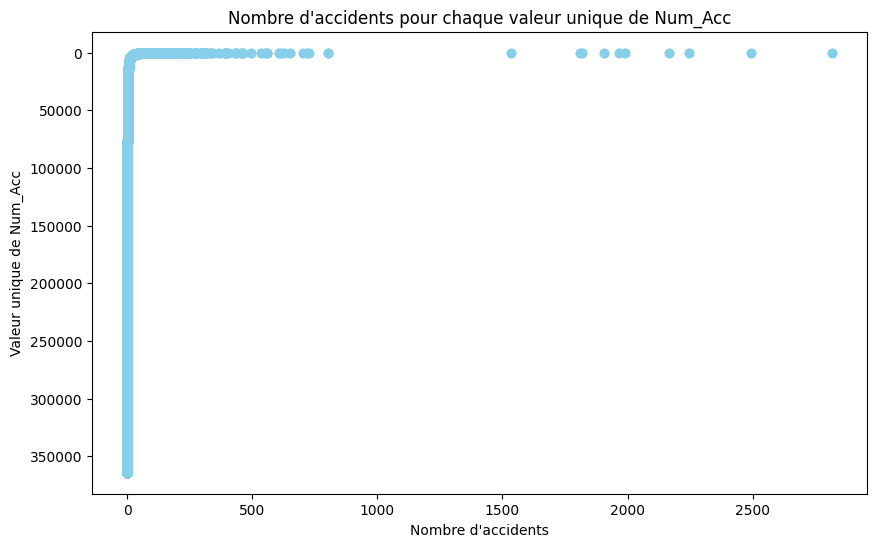

In [7]:
caracteristics_data = pd.read_csv('caracteristics.csv')

# Compter le nombre d'accidents pour chaque valeur unique dans Num_Acc
accidents_counts = caracteristics_data['Num_Acc'].value_counts()

# Créer une figure pour afficher les graphiques
plt.figure(figsize=(10, 6))

# Parcourir chaque valeur unique de Num_Acc et créer un diagramme en courbe horizontale
for index, value in enumerate(accidents_counts):
    plt.plot([value, value], [index, index], marker='o', color='skyblue')

# Ajouter des titres et des étiquettes
plt.title('Nombre d\'accidents pour chaque valeur unique de Num_Acc')
plt.xlabel('Nombre d\'accidents')
plt.ylabel('Valeur unique de Num_Acc')

# Inverser l'axe y pour afficher les valeurs uniques de Num_Acc dans l'ordre
plt.gca().invert_yaxis()

# Afficher le graphique
plt.show()

8. Quelle est la distribution des accidents par les conditions météorologiques?

IndexError: index 0 is out of bounds for axis 0 with size 0

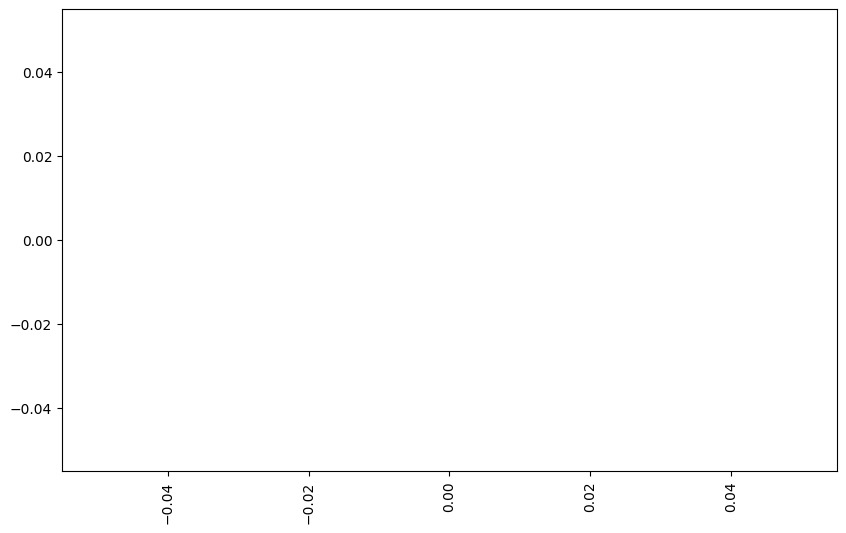

In [10]:
caracteristics_df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1', low_memory=False)
# Remplacement des valeurs numériques par des libellés pour les conditions atmosphériques
weather_mapping = {
    1: 'Normale',
    2: 'Pluie légère',
    3: 'Pluie forte',
    4: 'Neige - grêle',
    5: 'Brouillard - fumée',
    6: 'Vent fort - tempête',
    7: 'Temps éblouissant',
    8: 'Temps couvert',
    9: 'Autre'
}

caracteristics_df['atm'] = caracteristics_df['atm'].map(weather_mapping)

# Analyser la colonne 'atm' (conditions atmosphériques) pour compter le nombre d'accidents par météo
accidents_by_weather = caracteristics_df['atm'].value_counts()

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
accidents_by_weather.plot(kind='bar', color='purple')
plt.title('Distribution des accidents par conditions atmosphériques')
plt.xlabel('Conditions atmosphériques')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Quel est le mois où les accidents sont les plus fréquents faits?

In [71]:
import pandas as pd
import plotly.express as px

# Charger le fichier CSV en spécifiant l'encodage
caracteristics_df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')

# Créer un dictionnaire pour mapper les numéros de mois aux noms des mois
month_mapping = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}

# Mapper les numéros de mois aux noms des mois dans le DataFrame
caracteristics_df['mois'] = caracteristics_df['mois'].map(month_mapping)

# Analyser la colonne 'mois' pour compter le nombre d'accidents par mois
accidents_by_month = caracteristics_df['mois'].value_counts().reset_index()
accidents_by_month.columns = ['mois', 'nombre_accidents']

# Trier les mois par nombre d'accidents (du plus grand au plus petit)
accidents_by_month = accidents_by_month.sort_values(by='nombre_accidents', ascending=False)

# Définir une seule couleur (jaune) avec différentes intensités
color_scale = px.colors.sequential.YlGn

# Créer la treemap avec Plotly en utilisant les noms des mois comme labels et en appliquant la couleur jaune avec différentes intensités
fig = px.treemap(accidents_by_month, path=['mois'], values='nombre_accidents', color='nombre_accidents',
                 color_continuous_scale=color_scale)
fig.update_layout(title='Distribution des accidents par mois (Tree map)', coloraxis_showscale=False)
fig.show()



C:\Users\aitch\AppData\Local\Temp\ipykernel_25532\2289136816.py:5: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.

